<a href="https://colab.research.google.com/github/jkginfinite/fullstack/blob/main/regression_fullstack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Ordinary Least Squares Regression with Python

In this notebook, we will load, explore and fit a regression model on a housing dataset. The goal is to use LinearRegression to predict the SalePrice of the home.

# Begin by loading and examining the Boston housing dataset

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
df = pd.concat([pd.DataFrame(housing['data']), housing['target']], axis=1)#.dropna()
target='SalePrice'
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


# Lets examine what our predictor dataset looks like

In [ ]:
df.drop(target,axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,Normal


# Now lets take a look at what our target dataset looks like: (its the Home Price)

In [ ]:
df[target]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# To make our analysis easier, lets only focus on the columns with numbers in them

In [ ]:
df = df[[j for j in df.columns if df.dtypes[j] in [int,float]]]
df.dropna(inplace=True)
print(df.shape)
df.head()

(1121, 38)


<ipython-input-37-33d3bbf6f424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Now split the data into a train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(target,axis=1), df[target], test_size=0.2, random_state=42)

# Now fit the model on our training data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#Predict on the test & train sets

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Now lets calculate the R2 score and mean squared error on the train & test sets

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

r2_test = r2_score(y_test_pred,y_test)
r2_train = r2_score(y_train_pred,y_train)

mse_test = mean_squared_error(y_test_pred,y_test)
mse_train = mean_squared_error(y_train_pred,y_train)

print(f"R2_test: {r2_test}")
print(f"R2_train: {r2_train}")
print(f"MSE_test: {mse_test}")
print(f"MSE_train: {mse_train}")

R2_test: 0.6543456220487476
R2_train: 0.7627053457679336
MSE_test: 1591724600.5769699
MSE_train: 1267134578.6465068


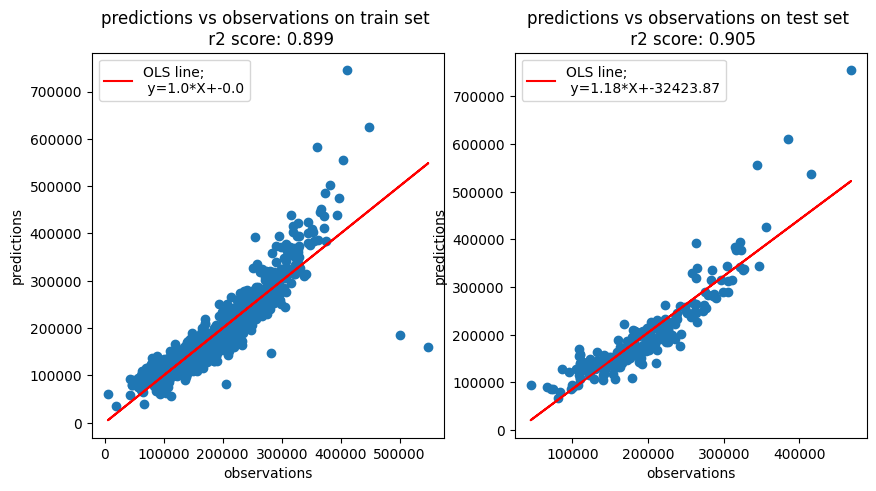

In [43]:
import matplotlib.pyplot as plt
from scipy import stats
def predictions_vs_observations(observations,predictions,label):
    slope, intercept, r_value, p_value, std_err = stats.linregress(observations,predictions)
    plt.title('predictions vs observations on {0} set \n r2 score: {1}'.format(label,round(r_value,4)))
    plt.scatter(observations,predictions)
    plt.ylabel('predictions')
    plt.xlabel('observations')
    line = slope*observations+intercept
    plt.plot(observations,line,color='red',label='OLS line;\n y={0}*X+{1}'.format(round(slope,2),round(intercept,2)))
    plt.legend()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
predictions_vs_observations(y_train_pred,y_train,'train')
plt.subplot(1,2,2)
predictions_vs_observations(y_test_pred,y_test,'test')
plt.show()